In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px


In [2]:
stores = pd.read_csv("/content/stores.csv")
transactions = pd.read_csv("/content/transactions.csv")
oil = pd.read_csv("/content/oil.csv")
holidays = pd.read_csv("/content/holidays_events.csv")
test = pd.read_csv("/content/test.csv")
sample_submission = pd.read_csv("/content/sample_submission.csv")
train = pd.read_csv("/content/train.csv")



In [3]:
def check_df(df, name):
    print(f"--- {name} ---")
    print("Shape:-", df.shape)
    print("-----:Dtypes-----:\n", df.dtypes)
    print("----:Missing:----\n", df.isnull().sum())
    print("----:Duplicates:----\n", df.duplicated().sum())
    print("----:Describe:----\n", stores.describe())
    print("----:nunique:----\n", stores.nunique())

    display(df.head())
    print("\n")


***(1) stores.csv***

In [4]:
check_df(stores, "stores")
print("----:info:----\n")
stores.info()

--- stores ---
Shape:- (54, 5)
-----:Dtypes-----:
 store_nbr     int64
city         object
state        object
type         object
cluster       int64
dtype: object
----:Missing:----
 store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64
----:Duplicates:----
 0
----:Describe:----
        store_nbr    cluster
count  54.000000  54.000000
mean   27.500000   8.481481
std    15.732133   4.693395
min     1.000000   1.000000
25%    14.250000   4.000000
50%    27.500000   8.500000
75%    40.750000  13.000000
max    54.000000  17.000000
----:nunique:----
 store_nbr    54
city         22
state        16
type          5
cluster      17
dtype: int64


,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4




----:info:----

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


(2) transactions.csv

In [5]:
check_df(transactions, "transactions")
print("----:info:----\n")
transactions.info()

--- transactions ---
Shape:- (83488, 3)
-----:Dtypes-----:
 date            object
store_nbr        int64
transactions     int64
dtype: object
----:Missing:----
 date            0
store_nbr       0
transactions    0
dtype: int64
----:Duplicates:----
 0
----:Describe:----
        store_nbr    cluster
count  54.000000  54.000000
mean   27.500000   8.481481
std    15.732133   4.693395
min     1.000000   1.000000
25%    14.250000   4.000000
50%    27.500000   8.500000
75%    40.750000  13.000000
max    54.000000  17.000000
----:nunique:----
 store_nbr    54
city         22
state        16
type          5
cluster      17
dtype: int64


,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922




----:info:----

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


In [6]:
print((transactions["transactions"] <= 0).sum())

0


**NO negative or zero transaction**

In [7]:
print("Date range is ",transactions["date"].min()," to " , transactions["date"].max())

Date range is  2013-01-01  to  2017-08-15


## **(3)oil.csv**

In [8]:
check_df(oil, "oil")
print("----:info:----\n")
oil.info()

--- oil ---
Shape:- (1218, 2)
-----:Dtypes-----:
 date           object
dcoilwtico    float64
dtype: object
----:Missing:----
 date           0
dcoilwtico    43
dtype: int64
----:Duplicates:----
 0
----:Describe:----
        store_nbr    cluster
count  54.000000  54.000000
mean   27.500000   8.481481
std    15.732133   4.693395
min     1.000000   1.000000
25%    14.250000   4.000000
50%    27.500000   8.500000
75%    40.750000  13.000000
max    54.000000  17.000000
----:nunique:----
 store_nbr    54
city         22
state        16
type          5
cluster      17
dtype: int64


,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20




----:info:----

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


as we can see there are some missing value is present in our dataset we will fix it




 **Check negative prices:** **bold text**

In [9]:
print((oil["dcoilwtico"] < 0).sum())


0


In [10]:
print("Date range is ",oil["date"].min()," to " ,oil["date"].max())


Date range is  2013-01-01  to  2017-08-31


**(4) holidays_events.csv**

In [11]:
check_df(holidays, "holidays")
print("----:info:----\n")
holidays.info()

--- holidays ---
Shape:- (350, 6)
-----:Dtypes-----:
 date           object
type           object
locale         object
locale_name    object
description    object
transferred      bool
dtype: object
----:Missing:----
 date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64
----:Duplicates:----
 0
----:Describe:----
        store_nbr    cluster
count  54.000000  54.000000
mean   27.500000   8.481481
std    15.732133   4.693395
min     1.000000   1.000000
25%    14.250000   4.000000
50%    27.500000   8.500000
75%    40.750000  13.000000
max    54.000000  17.000000
----:nunique:----
 store_nbr    54
city         22
state        16
type          5
cluster      17
dtype: int64


,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False




----:info:----

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


**-Holidays can boost or reduce sales. Need to know which are local/national.**

In [12]:
print(holidays["type"].value_counts())
print(holidays["locale"].value_counts())
print(holidays["transferred"].value_counts())

type
Holiday       221
Event          56
Additional     51
Transfer       12
Bridge          5
Work Day        5
Name: count, dtype: int64
locale
National    174
Local       152
Regional     24
Name: count, dtype: int64
transferred
False    338
True      12
Name: count, dtype: int64




*   This means there are 221 regular holidays, 56 events like sports or cultural events, 51 additional holidays, 12 transfer-type records, 5 bridge holidays, and 5 work days marked in the data.
*  This means there are 174 holidays/events that apply to the entire nation, 152 that are specific to certain cities or locations, and 24 that are specific to certain regions.
*   This means there are 338 holidays that actually occurred on their listed dates, and 12 holidays were transferred and did not happen on those dates.

**we need to clean data and can ignore some data to marge **

**(5) test.csv**

In [13]:
check_df(test, "test")
print("----:info:----\n")
test.info()

--- test ---
Shape:- (28512, 5)
-----:Dtypes-----:
 id              int64
date           object
store_nbr       int64
family         object
onpromotion     int64
dtype: object
----:Missing:----
 id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64
----:Duplicates:----
 0
----:Describe:----
        store_nbr    cluster
count  54.000000  54.000000
mean   27.500000   8.481481
std    15.732133   4.693395
min     1.000000   1.000000
25%    14.250000   4.000000
50%    27.500000   8.500000
75%    40.750000  13.000000
max    54.000000  17.000000
----:nunique:----
 store_nbr    54
city         22
state        16
type          5
cluster      17
dtype: int64


,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0




----:info:----

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [ ]:
print("date range is",test["date"].min(), "to", test["date"].max())

date range is 2017-08-16 to 2017-08-31


In [19]:
start_date = pd.to_datetime('2017-08-16')
end_date = pd.to_datetime('2017-08-31')
((end_date - start_date).days+1)

16

**(6) train.csv**

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [18]:
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [14]:
check_df(train, "train")
print("----:info:----\n")
train.info()

--- train ---
Shape:- (3000888, 6)
-----:Dtypes-----:
 id               int64
date            object
store_nbr        int64
family          object
sales          float64
onpromotion      int64
dtype: object
----:Missing:----
 id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64
----:Duplicates:----
 0
----:Describe:----
        store_nbr    cluster
count  54.000000  54.000000
mean   27.500000   8.481481
std    15.732133   4.693395
min     1.000000   1.000000
25%    14.250000   4.000000
50%    27.500000   8.500000
75%    40.750000  13.000000
max    54.000000  17.000000
----:nunique:----
 store_nbr    54
city         22
state        16
type          5
cluster      17
dtype: int64


,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0




----:info:----

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [15]:
print("date range is",train["date"].min(), "to", train["date"].max())

date range is 2013-01-01 to 2017-08-15


In [ ]:
print((train["sales"] < 0).sum())

0


**(7) sample_submission.csv**

In [16]:
check_df(sample_submission, "sample_submission")
print("----:info:----\n")
sample_submission.info()

--- sample_submission ---
Shape:- (28512, 2)
-----:Dtypes-----:
 id         int64
sales    float64
dtype: object
----:Missing:----
 id       0
sales    0
dtype: int64
----:Duplicates:----
 0
----:Describe:----
        store_nbr    cluster
count  54.000000  54.000000
mean   27.500000   8.481481
std    15.732133   4.693395
min     1.000000   1.000000
25%    14.250000   4.000000
50%    27.500000   8.500000
75%    40.750000  13.000000
max    54.000000  17.000000
----:nunique:----
 store_nbr    54
city         22
state        16
type          5
cluster      17
dtype: int64


,id,sales
0,3000888,0.0
1,3000889,0.0
2,3000890,0.0
3,3000891,0.0
4,3000892,0.0




----:info:----

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      28512 non-null  int64  
 1   sales   28512 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 445.6 KB


# 4. Parse Dates


*   Converting the date column from text (string) to a proper date/time format.
  




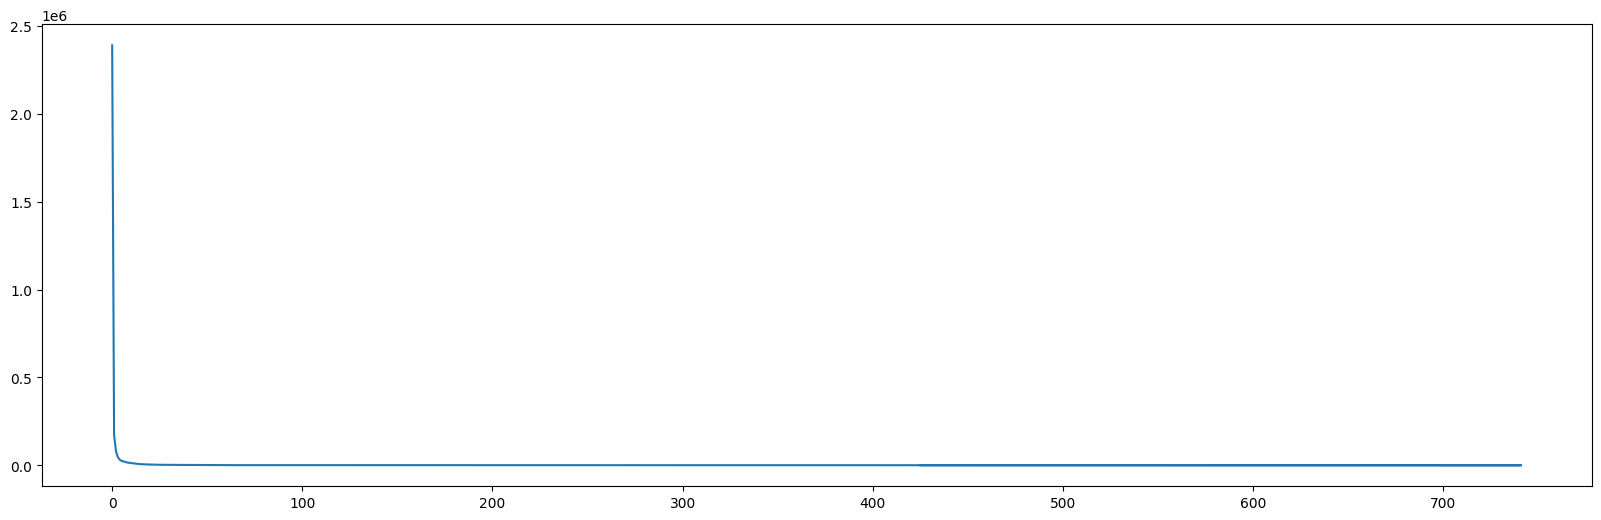

In [21]:
plt.figure(figsize=(20, 6))
freq=train['onpromotion'].value_counts()
plt.plot(freq.index, freq.values, linestyle='-')

<Axes: xlabel='date'>

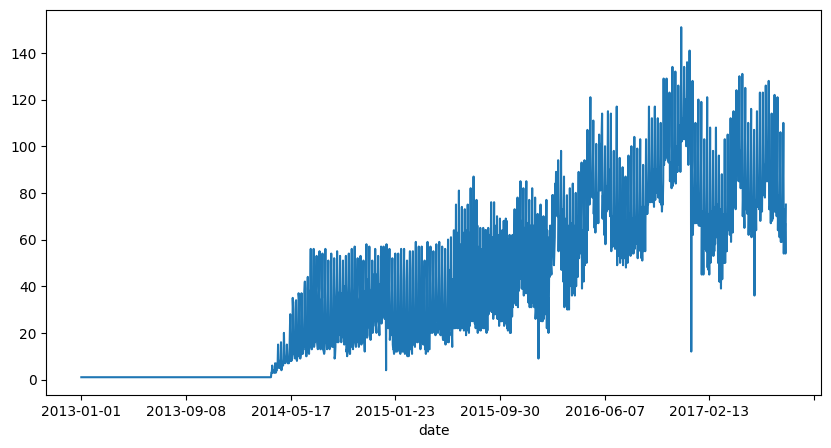

In [22]:
train.groupby('date')['onpromotion'].nunique().plot(figsize=(10, 5))

In [23]:
train.duplicated().sum()

np.int64(0)

In [24]:
train.groupby('date').size().nunique()

1

In [26]:
train.groupby('date').nunique()

,id,store_nbr,family,sales,onpromotion
date,,,,,
2013-01-01,1782,54,33,17,1
2013-01-02,1782,54,33,568,1
2013-01-03,1782,54,33,559,1
2013-01-04,1782,54,33,553,1
2013-01-05,1782,54,33,575,1
...,...,...,...,...,...
2017-08-11,1782,54,33,786,73
2017-08-12,1782,54,33,789,55
2017-08-13,1782,54,33,765,67


/tmp/ipython-input-29-814948971.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(


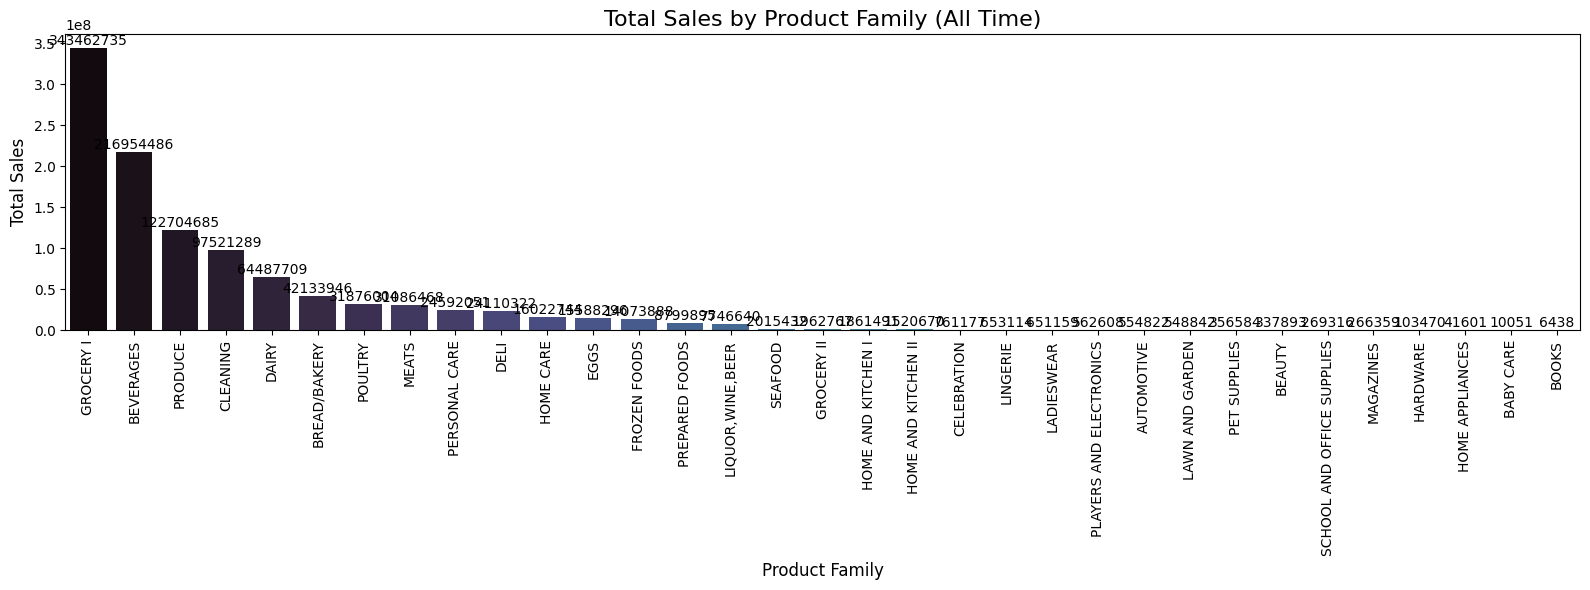

In [29]:
# Merge train with stores if needed (not required for 'family', already in train)
family_sales = train.groupby('family')['sales'].sum().reset_index()
family_sales = family_sales.sort_values('sales', ascending=False)

# Plot
plt.figure(figsize=(16, 6))
bar_plot = sns.barplot(
    data=family_sales,
    x='family',
    y='sales',
    palette='mako',
    order=family_sales['family']
)

# Add data labels
for p in bar_plot.patches:
    bar_plot.annotate(
        f'{p.get_height():.0f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 5),
        textcoords='offset points'
    )

# Formatting
plt.title("Total Sales by Product Family (All Time)", fontsize=16)
plt.xlabel("Product Family", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.xticks(rotation=90, ha='center')
plt.tight_layout()
plt.show()


/tmp/ipython-input-30-1208141118.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(


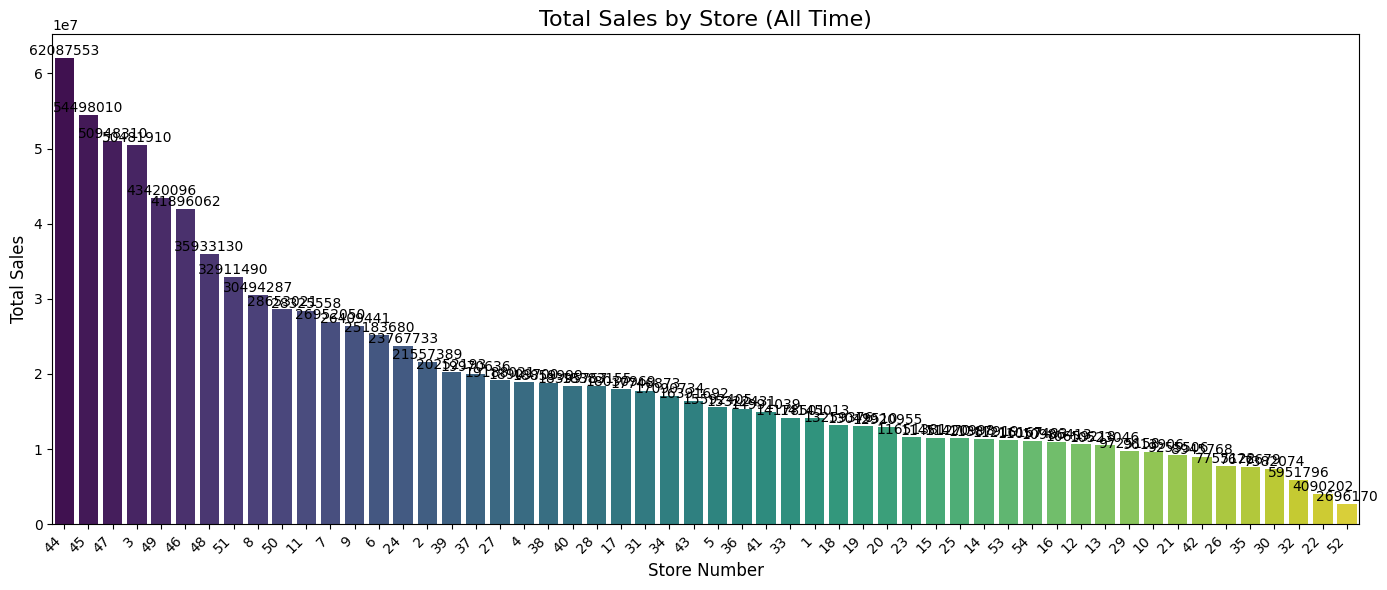

In [30]:
store_sales = train.groupby('store_nbr')['sales'].sum().reset_index()
store_sales = store_sales.sort_values('sales', ascending=False)

# Plot
plt.figure(figsize=(14, 6))
bar_plot = sns.barplot(
    data=store_sales,
    x='store_nbr',
    y='sales',
    palette='viridis',
    order=store_sales['store_nbr']
)

# Add data labels
for p in bar_plot.patches:
    bar_plot.annotate(
        f'{p.get_height():.0f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 5),
        textcoords='offset points'
    )

# Formatting
plt.title("Total Sales by Store (All Time)", fontsize=16)
plt.xlabel("Store Number", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [32]:
train['sales'].corr(train['onpromotion'])

np.float64(0.4279232048121313)

In [34]:
date_sales = train.groupby('date')['sales'].sum().reset_index()

least_sales_dates = date_sales.sort_values('sales').head(10)

least_sales_dates

,date,sales
0,2013-01-01,2511.618999
364,2014-01-01,8602.065404
1457,2017-01-01,12082.500997
728,2015-01-01,12773.616980
1092,2016-01-01,16433.394000
23,2013-01-24,247245.690995
72,2013-03-14,247541.420096
9,2013-01-10,258982.003049
28,2013-01-29,264488.818076
177,2013-06-27,266525.458966


When we load our data from CSV, the date column is usually just a string (like '2017-01-01'),
but for time series forecasting, we need it as a date/time object so we need to parse the dates

In [40]:
train = train.sort_values(["store_nbr", "family", "date"])
test  = test.sort_values(["store_nbr", "family", "date"])


Sorting the train and test data by store_nbr, family, and date ensures that each store-family time series is properly ordered in chronological sequence.

In [41]:
train = train.merge(stores, on="store_nbr", how="left")
test  = test.merge(stores, on="store_nbr", how="left")


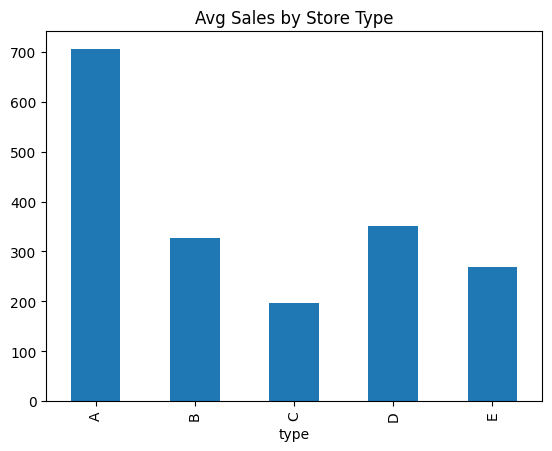

In [42]:
train.groupby("type")["sales"].mean().plot(kind="bar", title="Avg Sales by Store Type")
plt.show()


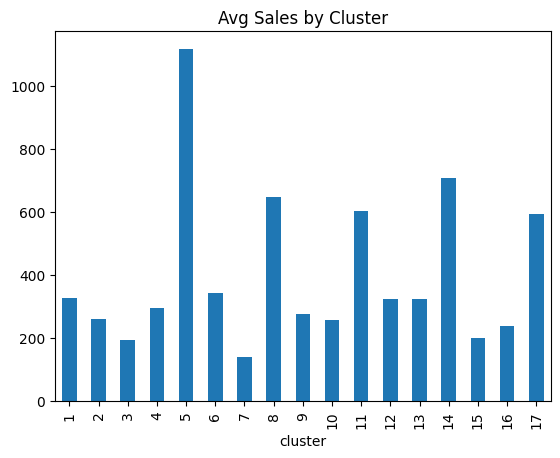

In [45]:
train.groupby("cluster")["sales"].mean().plot(kind="bar", title="Avg Sales by Cluster")
plt.show()


In [46]:
oil["dcoilwtico"] = oil["dcoilwtico"].ffill().bfill()


In [48]:
train["date"] = pd.to_datetime(train["date"], errors="coerce")
oil["date"]   = pd.to_datetime(oil["date"], errors="coerce")


In [50]:
train = train.merge(oil, on="date", how="left")


In [52]:
test["date"] = pd.to_datetime(test["date"], errors="coerce")
test = test.merge(oil, on="date", how="left")

In [55]:
train["date"] = pd.to_datetime(train["date"], errors="coerce")
oil["date"]   = pd.to_datetime(oil["date"], errors="coerce")


In [57]:
train = train.merge(oil, on="date", how="left", suffixes=('', '_oil'))


In [59]:
if 'dcoilwtico' in train.columns:
    train.drop(columns='dcoilwtico', inplace=True)

if 'dcoilwtico' in test.columns:
    test.drop(columns='dcoilwtico', inplace=True)

train = train.merge(oil, on="date", how="left")
test  = test.merge(oil, on="date", how="left")

train['dcoilwtico'].fillna(0, inplace=True)
test['dcoilwtico'].fillna(0, inplace=True)


/tmp/ipython-input-59-1866558185.py:10: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipython-input-59-1866558185.py:11: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=Tru

In [60]:
train["dcoilwtico"] = train["dcoilwtico"].ffill().bfill()



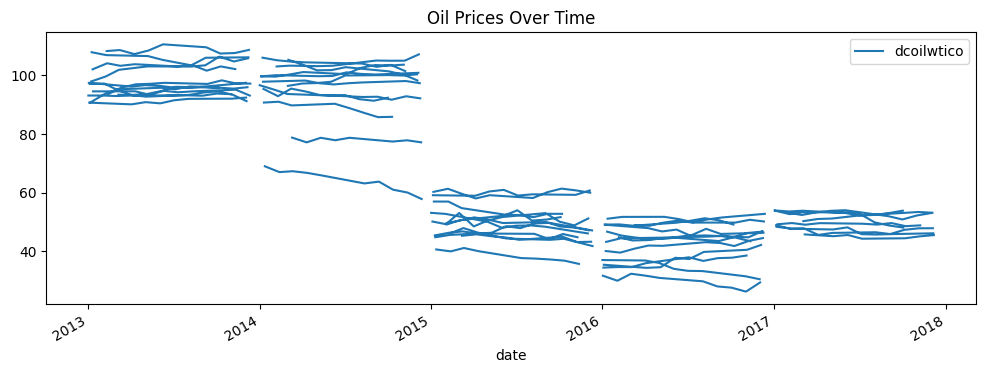

In [61]:
oil.plot(x="date", y="dcoilwtico", figsize=(12,4), title="Oil Prices Over Time")
plt.show()


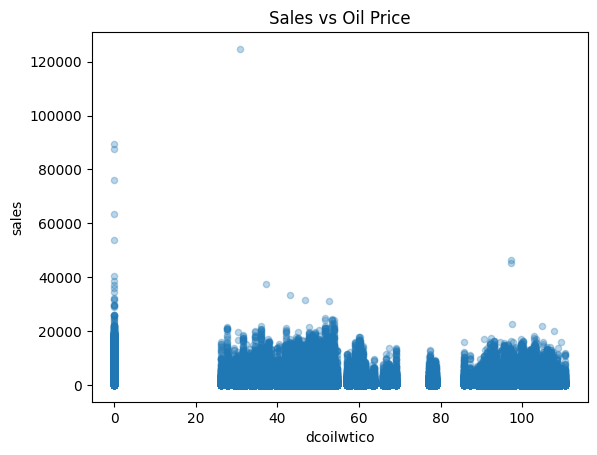

In [62]:
train.plot(x="dcoilwtico", y="sales", kind="scatter", alpha=0.3, title="Sales vs Oil Price")
plt.show()


In [63]:
oil['date'] = pd.to_datetime(oil['date'])

import plotly.express as px

# Original oil prices plot
fig = px.line(oil, x='date', y='dcoilwtico', title='Oil Prices')
fig.show()

# Interpolate missing values
oil['dcoilwtico'] = oil['dcoilwtico'].interpolate()

# Plot after interpolation
fig = px.line(oil, x='date', y='dcoilwtico', title='Oil Prices with Interpolation')
fig.show()


In [ ]:
df['dcoilwtico'] = df['dcoilwtico'].interpolate()
x = oil['date']
y = oil['dcoilwtico']
fig = px.line(oil, x, y, title='Merged Oil Prices with Time Interpolation')
fig.show()

In [69]:

holidays['date'] = pd.to_datetime(holidays['date'])
holidays.rename(columns={'type': 'holiday_type'}, inplace=True)
holidays.head()

,date,holiday_type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [70]:
holidays.isna().sum()

,0
date,0
holiday_type,0
locale,0
locale_name,0
description,0
transferred,0


In [72]:
holidays['date'].value_counts()[holidays['date'].value_counts() > 1].sort_values(ascending=False)

,count
date,
2014-06-25,4
2016-06-25,3
2012-06-25,3
2015-06-25,3
2017-06-25,3
2013-06-25,3
2015-12-22,2
2012-12-22,2
2012-12-24,2


In [74]:
train = pd.merge(train, holidays, on='date', how='left')

In [64]:
holidays_clean = holidays[
    (holidays["transferred"] == False) &
    (holidays["type"].isin(["Holiday", "Event"]))
]
holidays_clean["is_holiday"] = 1

train = train.merge(holidays_clean[["date", "is_holiday"]], on="date", how="left")
test  = test.merge(holidays_clean[["date", "is_holiday"]], on="date", how="left")

train["is_holiday"] = train["is_holiday"].fillna(0)
test["is_holiday"]  = test["is_holiday"].fillna(0)


/tmp/ipython-input-64-753668836.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**Keep only relevant holidays that impact sales.**

In [76]:
train['holiday_type'] = train['holiday_type'].fillna('Unknown')
train['holiday_type'] = train['holiday_type'].replace({'Additional': 'Holiday'})
train['holiday_type'] = train['holiday_type'].replace({'Bridge': 'Holiday'})
train['holiday_type'] = train['holiday_type'].replace({'Work Day': 'Unknown'})
train['holiday_type'] = train['holiday_type'].replace({'Transfer': 'Unknown'})


In [77]:
train.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,...,dcoilwtico_y,dcoilwtico_oil,dcoilwtico,is_holiday,transactions,holiday_type,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,...,93.14,93.14,93.14,1.0,0.0,Holiday,National,Ecuador,Primer dia del ano,False
1,1782,2013-01-02,1,AUTOMOTIVE,2.0,0,Quito,Pichincha,D,13,...,97.46,97.46,97.46,0.0,2111.0,Unknown,NaN,NaN,NaN,NaN
2,3564,2013-01-03,1,AUTOMOTIVE,3.0,0,Quito,Pichincha,D,13,...,90.71,90.71,90.71,0.0,1833.0,Unknown,NaN,NaN,NaN,NaN
3,5346,2013-01-04,1,AUTOMOTIVE,3.0,0,Quito,Pichincha,D,13,...,97.10,97.10,97.10,0.0,1863.0,Unknown,NaN,NaN,NaN,NaN
4,7128,2013-01-05,1,AUTOMOTIVE,5.0,0,Quito,Pichincha,D,13,...,90.74,90.74,90.74,0.0,1509.0,Unknown,National,Ecuador,Recupero puente Navidad,False


In [78]:
train['description'].nunique(),train['description'].unique()

(101,
 array(['Primer dia del ano', nan, 'Recupero puente Navidad',
        'Recupero puente primer dia del ano', 'Carnaval',
        'Fundacion de Manta', 'Provincializacion de Cotopaxi',
        'Fundacion de Cuenca', 'Cantonizacion de Libertad',
        'Cantonizacion de Riobamba', 'Viernes Santo', 'Dia del Trabajo',
        'Dia de la Madre-1', 'Cantonizacion del Puyo', 'Dia de la Madre',
        'Batalla de Pichincha', 'Cantonizacion de Guaranda',
        'Provincializacion de Imbabura', 'Fundacion de Machala',
        'Cantonizacion de Latacunga', 'Cantonizacion de El Carmen',
        'Fundacion de Santo Domingo', 'Cantonizacion de Cayambe',
        'Fundacion de Guayaquil-1', 'Fundacion de Guayaquil',
        'Fundacion de Esmeraldas', 'Primer Grito de Independencia',
        'Fundacion de Riobamba', 'Fundacion de Ambato',
        'Fundacion de Ibarra', 'Cantonizacion de Quevedo',
        'Independencia de Guayaquil',
        'Traslado Independencia de Guayaquil', 'Dia de Difunt

In [79]:
(train['description'].value_counts() / (33 * 54)).to_numpy()

array([16., 16., 16., 10., 10., 10.,  7.,  7.,  6.,  6.,  6.,  6.,  6.,
        5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  4.,
        4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,
        4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  3.,  3.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [81]:
train.drop('description',axis=1,inplace=True) #coulumn drop

In [83]:
train.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,dcoilwtico_x,dcoilwtico_y,dcoilwtico_oil,dcoilwtico,is_holiday,transactions,holiday_type,locale,locale_name,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,93.14,93.14,93.14,93.14,1.0,0.0,Holiday,National,Ecuador,False
1,1782,2013-01-02,1,AUTOMOTIVE,2.0,0,Quito,Pichincha,D,13,97.46,97.46,97.46,97.46,0.0,2111.0,Unknown,NaN,NaN,NaN
2,3564,2013-01-03,1,AUTOMOTIVE,3.0,0,Quito,Pichincha,D,13,90.71,90.71,90.71,90.71,0.0,1833.0,Unknown,NaN,NaN,NaN
3,5346,2013-01-04,1,AUTOMOTIVE,3.0,0,Quito,Pichincha,D,13,97.10,97.10,97.10,97.10,0.0,1863.0,Unknown,NaN,NaN,NaN
4,7128,2013-01-05,1,AUTOMOTIVE,5.0,0,Quito,Pichincha,D,13,90.74,90.74,90.74,90.74,0.0,1509.0,Unknown,National,Ecuador,False


In [84]:
train['holiday_type'].value_counts(dropna=False)/33/54

,count
holiday_type,
Unknown,1446.0
Holiday,261.0
Event,65.0


In [85]:
train['locale'].value_counts(dropna=False)/33/54

,count
locale,
NaN,1432.0
National,158.0
Local,153.0
Regional,29.0


/tmp/ipython-input-86-1545241879.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




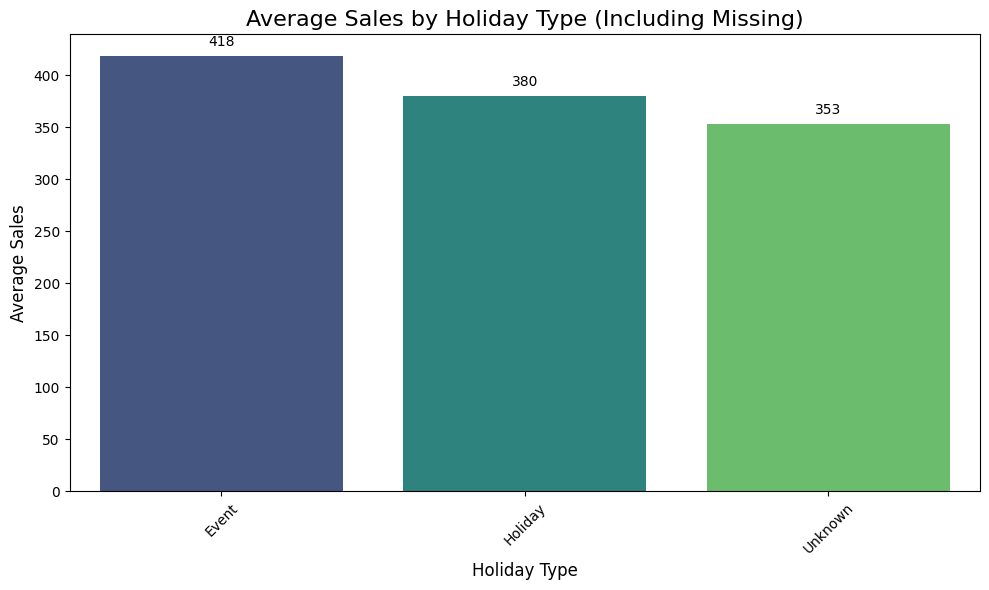

In [86]:
holiday_sales = train.groupby('holiday_type')['sales'].mean().reset_index()
holiday_sales = holiday_sales.sort_values('sales', ascending=False)

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(
    data=holiday_sales,
    x='holiday_type',
    y='sales',
    palette='viridis'
)

# Data labels
for p in bar_plot.patches:
    bar_plot.annotate(
        f'{p.get_height():.0f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom',
        xytext=(0, 5), textcoords='offset points'
    )

plt.title("Average Sales by Holiday Type (Including Missing)", fontsize=16)
plt.xlabel("Holiday Type", fontsize=12)
plt.ylabel("Average Sales", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-87-1106804363.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




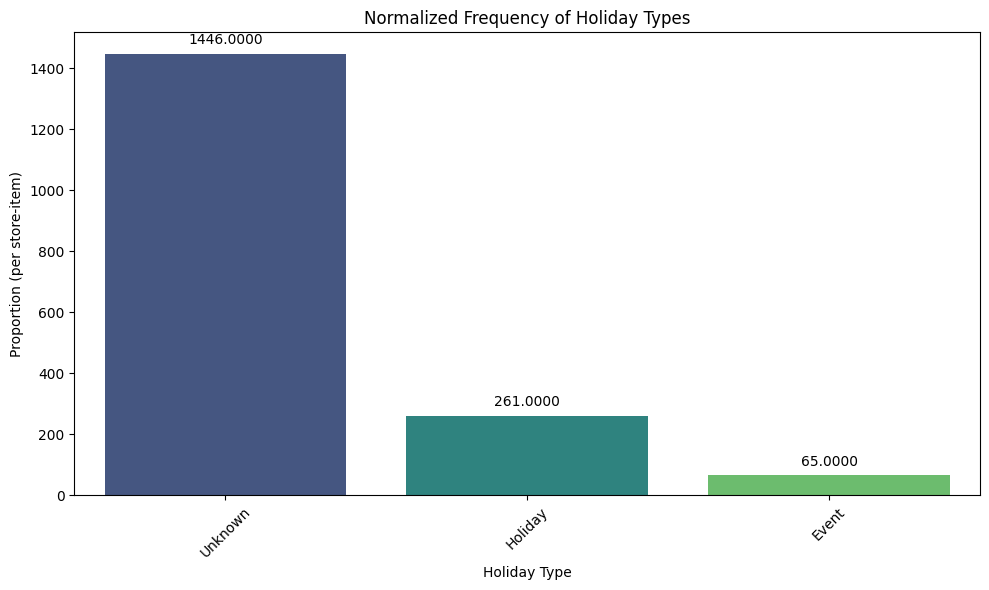

In [87]:
# Fill missing values and replace holiday types in train
train['holiday_type'] = train['holiday_type'].fillna('Unknown')
train['holiday_type'] = train['holiday_type'].replace({
    'Additional': 'Holiday',
    'Bridge': 'Holiday',
    'Work Day': 'Unknown',
    'Transfer': 'Unknown'
})

# Compute normalized frequency of each holiday type
holiday_counts = (train['holiday_type'].value_counts(dropna=False) / (33 * 54)).reset_index()
holiday_counts.columns = ['holiday_type', 'proportion']

# Convert to string for labeling
holiday_counts['holiday_type'] = holiday_counts['holiday_type'].astype(str)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=holiday_counts, x='holiday_type', y='proportion', palette='viridis')

# Add data labels on bars
for p in plt.gca().patches:
    plt.gca().annotate(
        f'{p.get_height():.4f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom',
        xytext=(0, 5), textcoords='offset points'
    )

plt.title("Normalized Frequency of Holiday Types")
plt.xlabel("Holiday Type")
plt.ylabel("Proportion (per store-item)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-88-3094084747.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




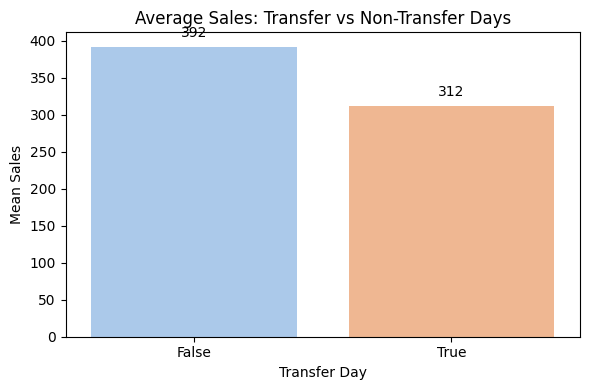

In [88]:
# Group by 'transferred' column and calculate mean sales
transfer_sales = train.groupby('transferred')['sales'].mean().reset_index()

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(data=transfer_sales, x='transferred', y='sales', palette='pastel')

# Add data labels
for p in plt.gca().patches:
    plt.gca().annotate(
        f'{p.get_height():.0f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom',
        xytext=(0, 5), textcoords='offset points'
    )

plt.title("Average Sales: Transfer vs Non-Transfer Days")
plt.xlabel("Transfer Day")
plt.ylabel("Mean Sales")
plt.tight_layout()
plt.show()


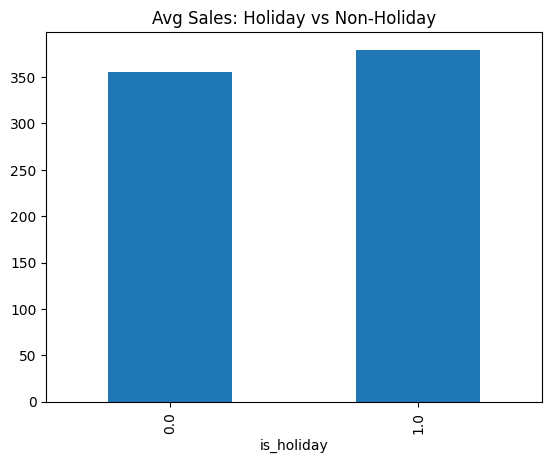

In [89]:
train.groupby("is_holiday")["sales"].mean().plot(kind="bar", title="Avg Sales: Holiday vs Non-Holiday")
plt.show()


**Merge transactions**

In [91]:
train = train.merge(transactions, on=['store_nbr', 'date'], how='left')


In [94]:
if 'transactions' in train.columns:
    train.drop(columns='transactions', inplace=True)
if 'transactions' in test.columns:
    test.drop(columns='transactions', inplace=True)

train = train.merge(transactions, on=["date", "store_nbr"], how="left")
test  = test.merge(transactions, on=["date", "store_nbr"], how="left")

train["transactions"] = train["transactions"].fillna(0)
test["transactions"]  = test["transactions"].fillna(0)


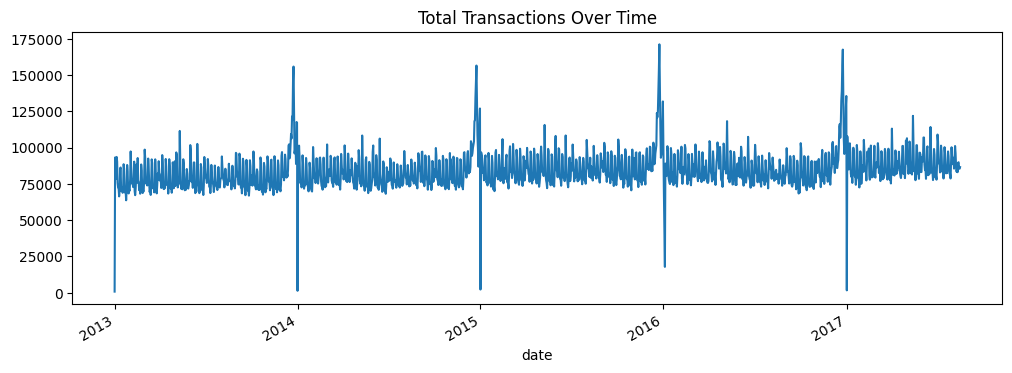

In [95]:
transactions.groupby("date")["transactions"].sum().plot(figsize=(12,4), title="Total Transactions Over Time")
plt.show()


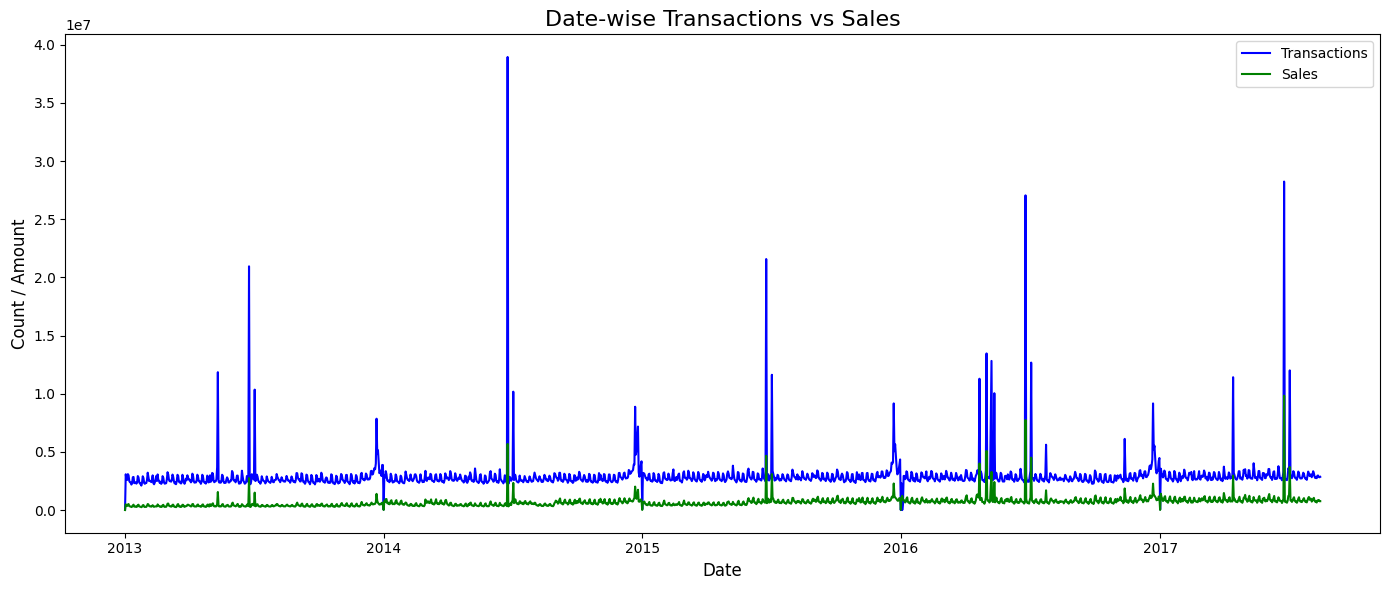

In [96]:
# Step 1: Group by date and aggregate
daily_summary = train.groupby('date')[['transactions', 'sales']].sum().reset_index()

# Step 2: Plot
plt.figure(figsize=(14, 6))
plt.plot(daily_summary['date'], daily_summary['transactions'], label='Transactions', color='blue')
plt.plot(daily_summary['date'], daily_summary['sales'], label='Sales', color='green')

# Formatting
plt.title("Date-wise Transactions vs Sales", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Count / Amount", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

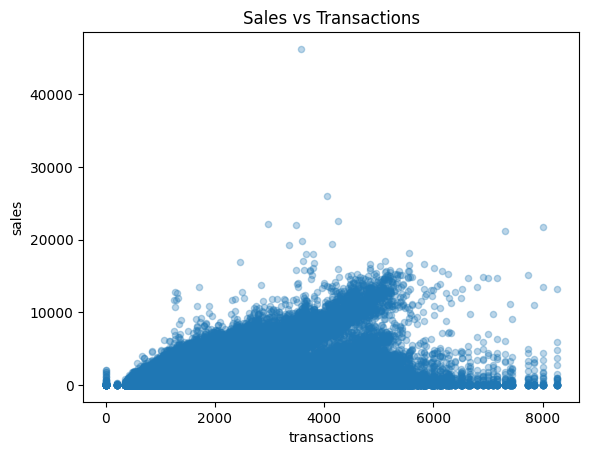

In [ ]:
train.plot(x="transactions", y="sales", kind="scatter", alpha=0.3, title="Sales vs Transactions")
plt.show()


In [ ]:
for df in [train, test]:
    df["dayofweek"] = df["date"].dt.dayofweek
    df["month"] = df["date"].dt.month
    df["year"] = df["date"].dt.year
    df["day"] = df["date"].dt.day
    df["weekofyear"] = df["date"].dt.isocalendar().week.astype(int)
    df["is_weekend"] = df["dayofweek"].isin([5,6]).astype(int)


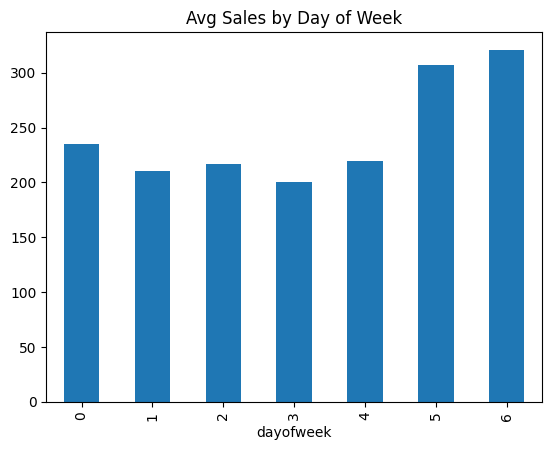

In [ ]:
train.groupby("dayofweek")["sales"].mean().plot(kind="bar", title="Avg Sales by Day of Week")
plt.show()


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create necessary columns in train
train["quarter"] = train["date"].dt.quarter
train["day_of_week"] = train["date"].dt.dayofweek
train["week"] = train["date"].dt.isocalendar().week

fig = make_subplots(
    rows=5, cols=1,
    subplot_titles=('Yearly', 'Monthly', 'Weekly', 'Quarterly', 'Day of Week')
)

def avr_sales(col):
    avr = train.groupby(col).agg({'sales': 'mean'}).reset_index()
    trace = go.Scatter(x=avr[col], y=avr['sales'])
    return trace

trace_1 = avr_sales('year')
trace_2 = avr_sales('month')
trace_3 = avr_sales('week')
trace_4 = avr_sales('quarter')
trace_5 = avr_sales('day_of_week')

fig.add_trace(trace_1, row=1, col=1)
fig.add_trace(trace_2, row=2, col=1)
fig.add_trace(trace_3, row=3, col=1)
fig.add_trace(trace_4, row=4, col=1)
fig.add_trace(trace_5, row=5, col=1)

fig.update_layout(
    height=800,
    title_text='Average Sales Per Period',
    showlegend=False,
    xaxis=dict(tickmode='linear', tick0=2013, dtick=1),
    xaxis4=dict(tickmode='linear', tick0=1, dtick=1)
)

fig.show()


In [ ]:
avr = train.groupby(['month', 'type']).agg({'sales': 'mean'}).reset_index()

import plotly.express as px

fig = px.line(avr, x='month', y='sales', color='type', title='Average Sales by Store Type')
fig.update_xaxes(tickmode='linear')
fig.show()


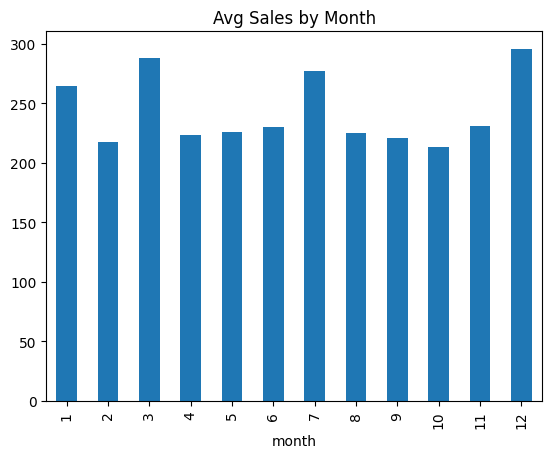

In [ ]:
train.groupby("month")["sales"].mean().plot(kind="bar", title="Avg Sales by Month")
plt.show()


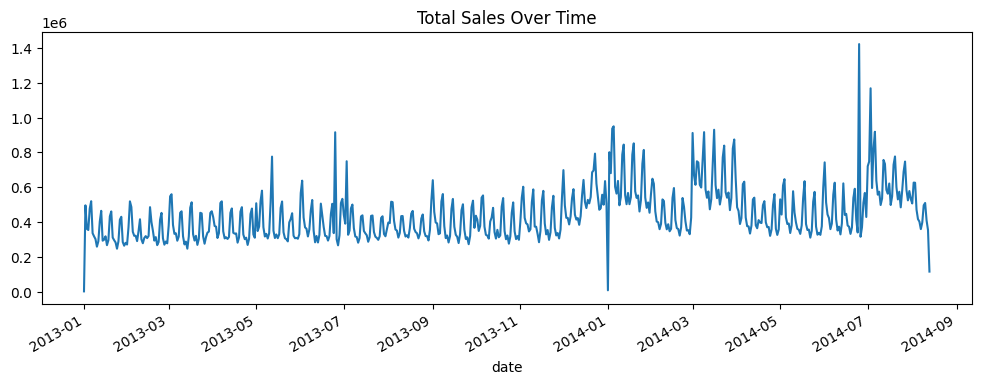

In [ ]:
train.groupby("date")["sales"].sum().plot(figsize=(12,4), title="Total Sales Over Time")
plt.show()


In [ ]:
train["Type of Day"] = train["is_weekend"].map({0: "Weekday", 1: "Weekend"})

store_sales = train.groupby(['Type of Day', 'store_nbr']).agg({'sales': 'mean'}).reset_index()

import plotly.express as px

fig = px.bar(store_sales, x='store_nbr', y='sales', color='Type of Day', title='Average Sales by Store Number')
fig.show()

fig = px.pie(store_sales, values='sales', names='Type of Day', title='Average Sales - Type of Day')
fig.show()


In [ ]:
corr = train[['sales', 'onpromotion', 'transactions', 'dcoilwtico']]
import plotly.express as px
fig = px.imshow(corr.corr())
fig.show()


In [ ]:
agg = train.groupby('date').agg({"sales" : "mean"}).reset_index()
import plotly.express as px
fig = px.line(agg, x='date', y="sales")
fig.update_layout(title = "Average Sales by Date")
fig.show()

agg2 = train.groupby('date').agg({"dcoilwtico" : "mean"}).reset_index()
fig = px.line(agg2, x='date', y="dcoilwtico")
fig.update_layout(title = "Oil Prices by Date")
fig.show()


In [ ]:
print(train.columns)
print(train.shape, test.shape)
# Check nulls in the processed dataset
train.isnull().sum()


Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion', 'city',
       'state', 'type', 'cluster', 'dcoilwtico', 'is_holiday', 'transactions',
       'dayofweek', 'month', 'year', 'day', 'weekofyear', 'is_weekend',
       'quarter', 'day_of_week', 'week', 'Type of Day'],
      dtype='object')
(1062831, 23) (28512, 18)


,0
id,0
date,0
store_nbr,0
family,0
sales,0
onpromotion,0
city,0
state,0
type,0
cluster,0


In [ ]:
train.to_csv("train_preprocessed.csv", index=False)
test.to_csv("test_preprocessed.csv", index=False)


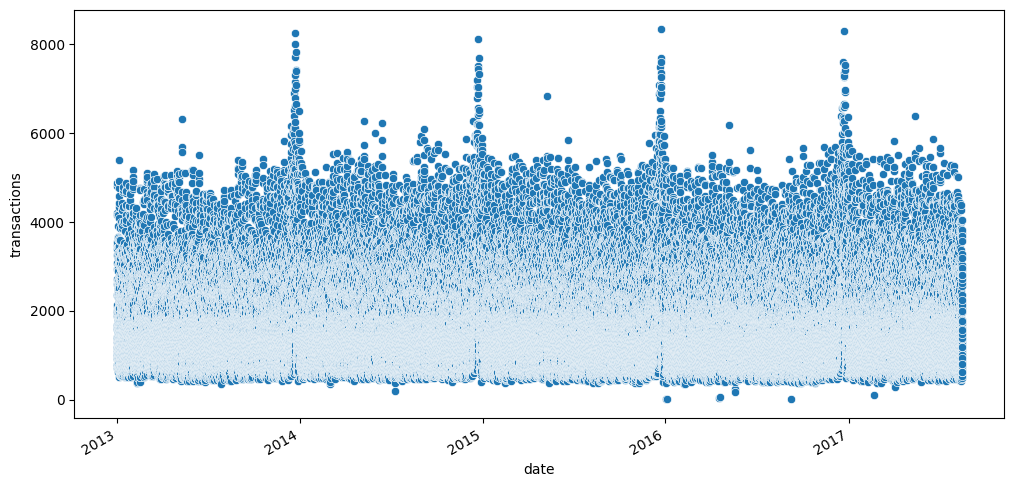

In [97]:
plt.figure(figsize = (12,6))
sns.scatterplot(x='date', y='transactions', data=transactions)
plt.gcf().autofmt_xdate()

In [104]:
data = pd.concat([train, test])
data.iloc[3000887:3000900]

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,...,dcoilwtico_oil,dcoilwtico,is_holiday,transactions_x,holiday_type,locale,locale_name,transferred,transactions_y,transactions
3000887,1526953,2015-05-09,52,EGGS,0.0,0,Manta,Manabi,A,11,...,NaN,0.00,0.0,0.0,Holiday,National,Ecuador,False,NaN,0.0
3000888,1528735,2015-05-10,52,EGGS,0.0,0,Manta,Manabi,A,11,...,46.28,46.28,1.0,0.0,Event,National,Ecuador,False,NaN,0.0
3000889,1530517,2015-05-11,52,EGGS,0.0,0,Manta,Manabi,A,11,...,45.27,45.27,0.0,0.0,Unknown,NaN,NaN,NaN,NaN,0.0
3000890,1532299,2015-05-12,52,EGGS,0.0,0,Manta,Manabi,A,11,...,NaN,0.00,1.0,0.0,Holiday,Local,Puyo,False,NaN,0.0
3000891,1534081,2015-05-13,52,EGGS,0.0,0,Manta,Manabi,A,11,...,NaN,0.00,0.0,0.0,Unknown,NaN,NaN,NaN,NaN,0.0
3000892,1535863,2015-05-14,52,EGGS,0.0,0,Manta,Manabi,A,11,...,NaN,0.00,0.0,0.0,Unknown,NaN,NaN,NaN,NaN,0.0
3000893,1537645,2015-05-15,52,EGGS,0.0,0,Manta,Manabi,A,11,...,NaN,0.00,0.0,0.0,Unknown,NaN,NaN,NaN,NaN,0.0
3000894,1539427,2015-05-16,52,EGGS,0.0,0,Manta,Manabi,A,11,...,NaN,0.00,0.0,0.0,Unknown,NaN,NaN,NaN,NaN,0.0
3000895,1541209,2015-05-17,52,EGGS,0.0,0,Manta,Manabi,A,11,...,NaN,0.00,0.0,0.0,Unknown,NaN,NaN,NaN,NaN,0.0
3000896,1542991,2015-05-18,52,EGGS,0.0,0,Manta,Manabi,A,11,...,NaN,0.00,0.0,0.0,Unknown,NaN,NaN,NaN,NaN,0.0


In [105]:
data = data.set_index('id')
data.head()

,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,dcoilwtico_x,...,dcoilwtico_oil,dcoilwtico,is_holiday,transactions_x,holiday_type,locale,locale_name,transferred,transactions_y,transactions
id,,,,,,,,,,,,,,,,,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,93.14,...,93.14,93.14,1.0,0.0,Holiday,National,Ecuador,False,NaN,0.0
1782,2013-01-02,1,AUTOMOTIVE,2.0,0,Quito,Pichincha,D,13,97.46,...,97.46,97.46,0.0,2111.0,Unknown,NaN,NaN,NaN,2111.0,2111.0
3564,2013-01-03,1,AUTOMOTIVE,3.0,0,Quito,Pichincha,D,13,90.71,...,90.71,90.71,0.0,1833.0,Unknown,NaN,NaN,NaN,1833.0,1833.0
5346,2013-01-04,1,AUTOMOTIVE,3.0,0,Quito,Pichincha,D,13,97.10,...,97.10,97.10,0.0,1863.0,Unknown,NaN,NaN,NaN,1863.0,1863.0
7128,2013-01-05,1,AUTOMOTIVE,5.0,0,Quito,Pichincha,D,13,90.74,...,90.74,90.74,0.0,1509.0,Unknown,National,Ecuador,False,1509.0,1509.0


# **Exploratory Data Analysis: Store Sales Time Series Forecasting**

## **Context**  
Accurate sales forecasting is critical for brick-and-mortar grocery stores to optimize inventory management. Overstocking leads to perishable waste, while understocking results in lost revenue and dissatisfied customers. Machine learning can enhance forecasting precision, ensuring stores maintain optimal stock levels.

This report details our exploratory data analysis (EDA) of the provided dataset to understand patterns, relationships, and potential challenges in forecasting sales.

---

## **Dataset Overview**  
The dataset consists of the following CSV files:  
1. **train.csv** – Historical sales data (2013-01-01 to 2017-08-15).  
2. **test.csv** – Forecasting period (2017-08-16 to 2017-08-31).  
3. **oil.csv** – Daily oil prices, which may influence sales.  
4. **holidays_events.csv** – Holidays and special events.  
5. **stores.csv** – Store metadata (city, state, type, cluster).  
6. **transactions.csv** – Daily transaction counts per store.  
7. **sample_submission.csv** – Expected submission format.  

---

## **Key Observations**

### **1. train.csv**  
- **Structure**:  
  - `store_nbr` – Identifies the store (54 unique stores).  
  - `family` – Product category (33 unique types).  
  - `sales` – Total sales (can be fractional, e.g., 1.5 kg of cheese).  
  - `onpromotion` – Number of promotional items for a product family on a given day.  

- **Findings**:  
  - No missing or duplicate values.  
  - Date range: **2013-01-01 to 2017-08-15** (1,684 days).  
  - Data is uniformly distributed across product families.  
  - Five dates are missing, all coinciding with Christmas (2013-12-25 to 2016-12-25) and 2017-08-16.  
  - Sales exhibit an upward trend over the years.  
  - Promotions (`onpromotion`) show a positive correlation with sales (**0.428**).  

- **Key Considerations**:  
  - Store-specific models may be necessary due to varying sales patterns across stores.  
  - Holiday effects (e.g., New Year's sales drop) must be accounted for as outliers.  

---

### **2. holidays_events.csv**  
- **Description**:  
  - Contains national, regional, and local holidays, including transferred and bridge holidays.  
  - `transferred` indicates if a holiday was officially moved (e.g., from a weekday to a weekend).  

- **Findings**:  
  - No missing or duplicate values.  
  - Date range: **2012-03-02 to 2017-12-26**.  
  - Categories:  
    - **Holiday** (221), **Event** (56), **Additional** (51), **Transfer** (12), **Bridge** (5).  
  - `locale` and `locale_name` are highly correlated (can be consolidated).  
  - Holidays show minimal direct correlation with sales (**max 0.017**), but domain knowledge suggests they influence demand.  

- **Preprocessing Decisions**:  
  - Merged `Additional` and `Bridge` into `Holiday`.  
  - Created a binary `locale_match` feature indicating if a holiday applies to a store’s location.  

---

### **3. oil.csv**  
- **Findings**:  
  - Contains daily oil prices, including the test period.  
  - **43 missing values** – Interpolated using adjacent values.  
  - Oil prices may indirectly affect transportation costs and consumer spending.  

---

### **4. stores.csv**  
- **Metadata**:  
  - `city` (22 unique), `state` (16 unique), `type` (A-E), `cluster` (1-17, grouping similar stores).  

- **Findings**:  
  - No missing or duplicate values.  
  - Store types and clusters show weak-moderate correlation with sales (**max 0.164**).  
  - Stores with the same attributes (e.g., city, type) can have significantly different sales, suggesting store-specific modeling.  

---

### **5. transactions.csv**  
- **Findings**:  
  - Daily transaction counts per store (2013-01-01 to 2017-08-15).  
  - No missing or duplicate values.  
  - Transactions correlate weakly with sales (**0.215**), possibly representing overall store traffic.  
  - Missing values (if any) were imputed with **-1** and flagged.  

---

## **Summary of Insights**  
1. **Temporal Trends**:  
   - Sales and promotions exhibit upward trends.  
   - Holidays and oil prices may require feature engineering for better modeling.  

2. **Store-Level Patterns**:  
   - Stores vary significantly, suggesting individualized models or store-based clustering.  

3. **Data Quality**:  
   - Minimal missing values; gaps (e.g., Christmas) require handling.  

4. **Feature Engineering**:  
   - Holiday effects, promotions, and store metadata were tested but showed low correlation.  
   - Domain knowledge (e.g., promotions driving sales) justifies retaining these features.  

---


---